<a href="https://colab.research.google.com/github/vitoriaferreirap/DeepLearning/blob/main/perceptron_animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# L03: Perceptron animation

## Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# numpy:
# - Base matemática das redes neurais
# - Vetores, matrizes, produto escalar
# - É aqui que vive o "núcleo linear do neurônio"

# matplotlib:
# - Usado para VISUALIZAR os dados
# - No Perceptron, visualizar é essencial para entender
#   se o problema é linearmente separável


## Montando o drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Aqui NÃO existe aprendizado de máquina.
# Isso serve apenas para acessar o arquivo de dados.


Mounted at /content/drive


## Preparing a toy dataset

In [ ]:
data = np.genfromtxt(
    '/content/drive/MyDrive/detasPercepton/perceptron_toydata.txt',
    delimiter='\t'
)

# Estamos carregando um "toy dataset":
# - pequeno
# - artificial
# - criado para ENSINAR conceitos
#
# Cada linha do arquivo representa um exemplo:
# x1   x2   y


In [ ]:
X, y = data[:, :2], data[:, 2]
y = y.astype(int)

# X  -> entradas do neurônio (features)
# y  -> saída desejada (rótulo da classe)

# Para o Perceptron clássico:
# - X são os valores que entram no neurônio
# - y é o "gabarito" que o neurônio deve aprender

# Cada amostra x será algo como:
# x = [x1, x2]


In [ ]:
print('Class label counts:', np.bincount(y))
print('X.shape:', X.shape)
print('y.shape:', y.shape)

# Aqui estamos verificando:
# - Quantas amostras por classe existem
# - Quantas entradas cada exemplo possui
#
# Resultado esperado:
# - 100 amostras
# - 2 entradas por amostra
# - 2 classes (0 e 1)
#
# Esse é o cenário IDEAL para um Perceptron binário


Class label counts: [50 50]
X.shape: (100, 2)
y.shape: (100,)


In [ ]:
shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)

X, y = X[shuffle_idx], y[shuffle_idx]

# O Perceptron aprende de forma SEQUENCIAL.
# Se os dados estiverem ordenados, isso pode:
# - enviesar o aprendizado
# - atrasar a convergência
#
# Embaralhar é uma boa prática em ML.


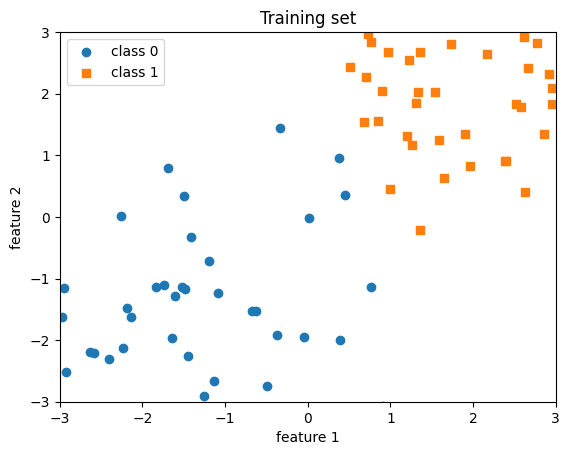

In [ ]:
# VISUALIZAÇÃO DOS DADOS - gráfico: definição do problema

plt.scatter(
    X[y == 0, 0],
    X[y == 0, 1],
    label='class 0',
    marker='o'
)

plt.scatter(
    X[y == 1, 0],
    X[y == 1, 1],
    label='class 1',
    marker='s'
)

plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()


## Defining the Perceptron model

In [ ]:
# objeto
class Perceptron():
    # CONSTRUTOR DO NEURÔNIO
    # - Define a estrutura básica do Perceptron
    # - Cria pesos e bias com base no número de entradas
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros((num_features, 1), dtype=float)
        self.bias = np.zeros(1, dtype=float)

    # FORWARD PASS
    # - Executa a soma ponderada (núcleo linear do neurônio)
    # - Aplica a função de ativação degrau
    # - Retorna a classe prevista (0 ou 1)
    def forward(self, x):
        linear = np.dot(x, self.weights) + self.bias
        predictions = np.where(linear > 0., 1, 0)
        return predictions

    # CÁLCULO DO ERRO
    # - Compara a previsão com o valor real
    # - Retorna o erro usado no aprendizado
    def backward(self, x, y):
        predictions = self.forward(x)
        errors = y - predictions
        return errors

    # TREINAMENTO DO PERCEPTRON
    # - Percorre o dataset por várias épocas
    # - Aplica a regra de aprendizado do Perceptron
    # - Atualiza pesos e bias amostra por amostra
    def train(self, x, y, epochs):
        for e in range(epochs):
            for i in range(y.shape[0]):
                errors = self.backward(
                    x[i].reshape(1, self.num_features),
                    y[i]
                ).reshape(-1)

                self.weights += (errors * x[i]).reshape(self.num_features, 1)
                self.bias += errors

    # AVALIAÇÃO DO MODELO
    # - Executa apenas o forward pass
    # - Calcula a acurácia do Perceptron
    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = np.sum(predictions == y) / y.shape[0]
        return accuracy


## Training the Perceptron

In [ ]:
#Esse trecho executa o treinamento online do Perceptron,
#registra a evolução dos parâmetros e interrompe o aprendizado quando a separação linear perfeita é alcançada

# Guarda o histórico dos pesos durante o treinamento
all_weights = []

# Guarda o histórico do bias durante o treinamento
all_biases = []

# Cria um Perceptron com duas entradas (duas features)
ppn = Perceptron(num_features=2)

# Variável para acompanhar a acurácia do modelo
acc = 0

# Loop de treinamento por épocas
for epoch in range(10):

    # Percorre todas as amostras do dataset
    for i in range(X.shape[0]):

        # Salva os pesos atuais antes da atualização
        all_weights.append(ppn.weights.copy())

        # Salva o bias atual antes da atualização
        all_biases.append(ppn.bias.copy())

        # Treina o Perceptron com uma única amostra
        ppn.train(X[i].reshape(1, -1), y[i].reshape(-1), epochs=1)

        # Avalia o desempenho no conjunto completo
        acc = ppn.evaluate(X, y)

        # Interrompe se todas as amostras forem classificadas corretamente
        if acc == 1.0:
            break

    # Finaliza o treinamento ao atingir separação perfeita
    if acc == 1.0:
        all_weights.append(ppn.weights.copy())
        all_biases.append(ppn.bias.copy())
        break

## Plotting the boundary

In [ ]:
# Importa bibliotecas para gerar animação e visualização
import imageio
import numpy as np
import matplotlib.pyplot as plt

# Define estilo do ponto destacado durante o treinamento
scatter_highlight_defaults = {
    'facecolors': 'none',
    'edgecolors': 'k',
    'alpha': 1.0,
    'linewidths': 2,
    'marker': 'o',
    's': 150
}

# Função que desenha o estado do Perceptron em uma iteração específica
def plot(i):

    # Cria figura e eixo do gráfico
    fig, ax = plt.subplots()

    # Recupera os pesos e o bias da iteração atual
    w, b = all_weights[i], all_biases[i]

    # Evita divisão por zero ao calcular a reta de decisão
    if w[1] == 0:
        plt.close(fig)
        return np.zeros((480, 640, 3), dtype=np.uint8)

    # Define um ponto inicial da reta de decisão
    x_min = -20
    y_min = (-(w[0] * x_min) - b[0]) / w[1]

    # Define um ponto final da reta de decisão
    x_max = 20
    y_max = (-(w[0] * x_max) - b[0]) / w[1]

    # Define os limites do espaço geométrico
    ax.set_xlim([-5., 5])
    ax.set_ylim([-5., 5])

    # Exibe a iteração atual no gráfico
    ax.set_xlabel(f'Iteration {i}')

    # Desenha a fronteira de decisão do Perceptron
    ax.plot([x_min, x_max], [y_min, y_max], color='k')

    # Plota os pontos da classe 0
    ax.scatter(X[y == 0, 0], X[y == 0, 1], marker='o', label='class 0')

    # Plota os pontos da classe 1
    ax.scatter(X[y == 1, 0], X[y == 1, 1], marker='s', label='class 1')

    # Destaca a amostra usada na iteração atual
    idx = i % X.shape[0]
    ax.scatter(X[idx][0], X[idx][1], **scatter_highlight_defaults)

    # Renderiza o gráfico na memória
    fig.canvas.draw()

    # Converte o gráfico em imagem
    buf = np.asarray(fig.canvas.buffer_rgba())
    image = buf[:, :, :3]

    # Fecha a figura para liberar memória
    plt.close(fig)

    # Retorna a imagem da iteração
    return image

# Gera um GIF mostrando a evolução da fronteira de decisão
imageio.mimsave(
    'training.gif',
    [plot(i) for i in range(len(all_weights))],
    fps=1
)


In [ ]:
# Lista que armazenará cada frame da animação
frames = []

# Gera uma imagem para cada estado salvo do modelo
for i in range(len(all_weights)):
    frames.append(plot(i))

# Exibe a quantidade de frames gerados
print("frames gerados:", len(frames))

# Importa biblioteca para salvar animação
import imageio

# Salva o GIF com a evolução do treinamento
imageio.mimsave('/content/training.gif', frames, fps=1)

# Indica quantas vezes o estado do modelo (pesos e bias) foi registrado


frames gerados: 50


In [ ]:
#quantidade de amostra
X.shape[0]


100

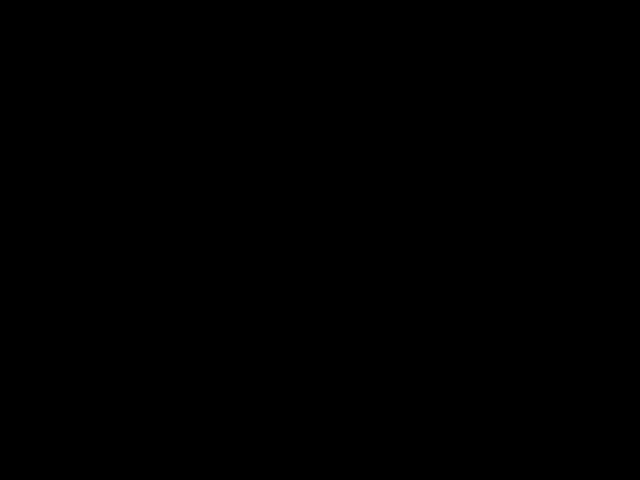

In [ ]:
from IPython.display import Image, display
display(Image(filename='/content/training.gif'))
